https://www.youtube.com/watch?v=rf_EQvubKlk

Выработка рекомендации поведения трейдера на основе паттернов и индикаторов (MACD) \\
Иванов Александр J4211

# Базовый вариант

Используем библиотеку talib с индикаторами ТА

In [1]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4433    0  4433    0     0  23841      0 --:--:-- --:--:-- --:--:-- 23962
100  517k  100  517k    0     0  1069k      0 --:--:-- --:--:-- --:--:-- 1069k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4509    0  4509    0     0  19129      0 --:--:-- --:--:-- --:--:-- 19187
100  392k  100  392k    0     0   683k      0 --:--:-- --:--:-- --:--:-- 1943k


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf # для загрузки акций

In [3]:
paper = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'
period = '1h' # по умолчанию 1d

In [4]:
stock_data = yf.download(paper, start=start_date, end=end_date, interval = period)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-03 09:30:00-05:00,177.830002,181.429993,177.710007,180.839996,180.839996,25170269
2022-01-03 10:30:00-05:00,180.850006,181.770004,180.389999,181.749893,181.749893,11976542
2022-01-03 11:30:00-05:00,181.750000,181.770004,181.074997,181.600006,181.600006,8143152
2022-01-03 12:30:00-05:00,181.595001,182.279007,181.490005,182.229706,182.229706,8407914
2022-01-03 13:30:00-05:00,182.225006,182.880005,181.809998,181.865005,181.865005,11618629
...,...,...,...,...,...,...
2022-12-30 11:30:00-05:00,128.320007,129.080002,128.210007,128.815002,128.815002,7048763
2022-12-30 12:30:00-05:00,128.815002,129.029999,128.020004,128.330002,128.330002,5931448
2022-12-30 13:30:00-05:00,128.330002,128.669998,127.970001,128.220001,128.220001,6151192


Свечной график

In [5]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
                                     open=stock_data['Open'],
                                     high=stock_data['High'],
                                     low=stock_data['Low'],
                                     close=stock_data['Close'])])

fig.update_layout(title='Свечной график акций',
                  xaxis_title='Дата',
                  yaxis_title='Цена',
                  xaxis_rangeslider_visible=False)
fig.show()


Генерируем сигналы с помощью MACD

In [6]:
def generate_signals(data):
    # Вычисление MACD и сигнальной линии
    data['macd'], data['signal'], data['bc'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    data['position'] = 0
    data.loc[data['macd'] > data['signal'], 'position'] = 1  # Сигнал на покупку
    data.loc[data['macd'] < data['signal'], 'position'] = -1  # Сигнал на продажу

    return data

In [7]:
signals_data = generate_signals(stock_data)
signals_data['capital'] = 0
signals_data['pool'] = 0
signals_data['profit'] = 0
signals_data['Datetime'] = signals_data.index
signals_data.reset_index(drop=True, inplace=True)
signals_data

,Open,High,Low,Close,Adj Close,Volume,macd,signal,bc,position,capital,pool,profit,Datetime
0,177.830002,181.429993,177.710007,180.839996,180.839996,25170269,NaN,NaN,NaN,0,0,0,0,2022-01-03 09:30:00-05:00
1,180.850006,181.770004,180.389999,181.749893,181.749893,11976542,NaN,NaN,NaN,0,0,0,0,2022-01-03 10:30:00-05:00
2,181.750000,181.770004,181.074997,181.600006,181.600006,8143152,NaN,NaN,NaN,0,0,0,0,2022-01-03 11:30:00-05:00
3,181.595001,182.279007,181.490005,182.229706,182.229706,8407914,NaN,NaN,NaN,0,0,0,0,2022-01-03 12:30:00-05:00
4,182.225006,182.880005,181.809998,181.865005,181.865005,11618629,NaN,NaN,NaN,0,0,0,0,2022-01-03 13:30:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,128.320007,129.080002,128.210007,128.815002,128.815002,7048763,-0.503129,-0.684641,0.181512,1,0,0,0,2022-12-30 11:30:00-05:00
1749,128.815002,129.029999,128.020004,128.330002,128.330002,5931448,-0.516636,-0.651040,0.134404,1,0,0,0,2022-12-30 12:30:00-05:00
1750,128.330002,128.669998,127.970001,128.220001,128.220001,6151192,-0.530106,-0.626853,0.096747,1,0,0,0,2022-12-30 13:30:00-05:00
1751,128.225006,129.179993,128.080002,128.910004,128.910004,8598240,-0.479576,-0.597398,0.117822,1,0,0,0,2022-12-30 14:30:00-05:00


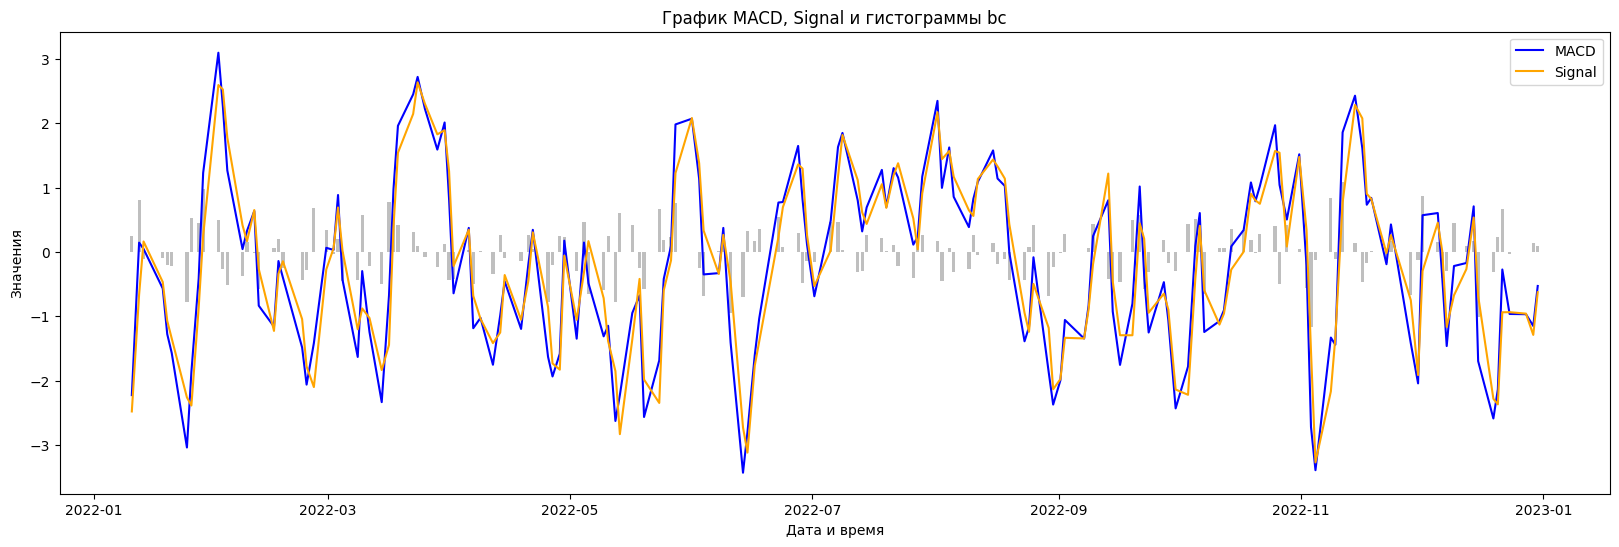

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sampled_data = signals_data.iloc[::10]

# Линия MACD
plt.plot(sampled_data['Datetime'], sampled_data['macd'], label='MACD', color='blue')

# Линия Signal
plt.plot(sampled_data['Datetime'], sampled_data['signal'], label='Signal', color='orange')

# Гистограмма bc
plt.bar(sampled_data['Datetime'], sampled_data['bc'], color='gray', alpha=0.5)

plt.legend()
plt.xlabel('Дата и время')
plt.ylabel('Значения')
plt.title('График MACD, Signal и гистограммы bc')
plt.show()


Обратное тестированеи проверки стратегии

In [9]:
def backtest_strategy(data):
    initial_capital = 100000  # Начальный капитал
    capital = initial_capital
    pool = 0

    for i in range(1, len(data)):
        if data['position'][i] == 1 and pool == 0:  # Сигнал на покупку и нет открытой позиции
            pool = capital / data['Close'][i]
            capital = 0
        elif data['position'][i] == -1 and pool > 0:  # Сигнал на продажу и есть открытая позиция
            capital = pool * data['Close'][i]
            pool = 0

        data.loc[i, 'capital'] = capital
        data.loc[i, 'pool'] = pool
        data.loc[i, 'profit'] = capital + pool * data['Close'][i] - initial_capital

    # return data
    final_value = capital if capital > 0 else pool * data['Close'].iloc[-1]
    return final_value - initial_capital

Посмотрим прибыль и ее динамику

In [10]:
basic_profit = backtest_strategy(signals_data)
basic_profit

9135.407262318797

In [11]:
signals_data

,Open,High,Low,Close,Adj Close,Volume,macd,signal,bc,position,capital,pool,profit,Datetime
0,177.830002,181.429993,177.710007,180.839996,180.839996,25170269,NaN,NaN,NaN,0,0.0,0.000000,0.000000,2022-01-03 09:30:00-05:00
1,180.850006,181.770004,180.389999,181.749893,181.749893,11976542,NaN,NaN,NaN,0,100000.0,0.000000,0.000000,2022-01-03 10:30:00-05:00
2,181.750000,181.770004,181.074997,181.600006,181.600006,8143152,NaN,NaN,NaN,0,100000.0,0.000000,0.000000,2022-01-03 11:30:00-05:00
3,181.595001,182.279007,181.490005,182.229706,182.229706,8407914,NaN,NaN,NaN,0,100000.0,0.000000,0.000000,2022-01-03 12:30:00-05:00
4,182.225006,182.880005,181.809998,181.865005,181.865005,11618629,NaN,NaN,NaN,0,100000.0,0.000000,0.000000,2022-01-03 13:30:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,128.320007,129.080002,128.210007,128.815002,128.815002,7048763,-0.503129,-0.684641,0.181512,1,0.0,839.826163,8182.209181,2022-12-30 11:30:00-05:00
1749,128.815002,129.029999,128.020004,128.330002,128.330002,5931448,-0.516636,-0.651040,0.134404,1,0.0,839.826163,7774.892980,2022-12-30 12:30:00-05:00
1750,128.330002,128.669998,127.970001,128.220001,128.220001,6151192,-0.530106,-0.626853,0.096747,1,0.0,839.826163,7682.511589,2022-12-30 13:30:00-05:00
1751,128.225006,129.179993,128.080002,128.910004,128.910004,8598240,-0.479576,-0.597398,0.117822,1,0.0,839.826163,8261.993692,2022-12-30 14:30:00-05:00


Отобразим на графиках сигналы и динамику прибыли

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=signals_data.index,
                                     open=signals_data['Open'],
                                     high=signals_data['High'],
                                     low=signals_data['Low'],
                                     close=signals_data['Close'])])

buy_signals = signals_data[signals_data['position'] == 1]
sell_signals = signals_data[signals_data['position'] == -1]

fig.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals['High'],
                         mode='markers',
                         name='Сигнал на покупку',
                         marker=dict(color='green', size=10)))

fig.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals['Low'],
                         mode='markers',
                         name='Сигнал на продажу',
                         marker=dict(color='red', size=10)))

fig.update_layout(title='Свечной график акций с моментами открытия/закрытия позиций',
                  xaxis_title='Дата',
                  yaxis_title='Цена',
                  xaxis_rangeslider_visible=False)

fig.show()


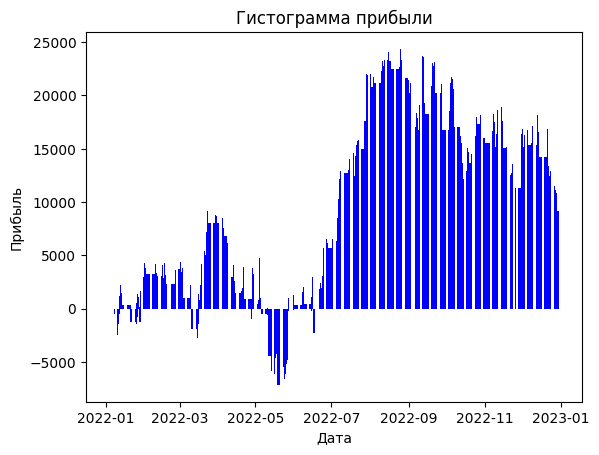

In [13]:
import matplotlib.pyplot as plt

plt.bar(signals_data['Datetime'], signals_data['profit'], color='blue')
plt.xlabel('Дата')
plt.ylabel('Прибыль')
plt.title('Гистограмма прибыли')
plt.show()

# Расширенный вариант

In [14]:
# копия на всякий случай
sd_copy = signals_data.copy()

Используя RF-модель предскажем сигналы

In [15]:
signals_data['capital_ml'] = 0
signals_data['pool_ml'] = 0
signals_data['profit_ml'] = 0
signals_data = signals_data.dropna()
signals_data.reset_index(drop=True, inplace=True)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


features = signals_data[['macd', 'signal', 'bc', 'Volume']]
labels = signals_data['position']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

signals_data['predicted_position'] = model.predict(features)

<ipython-input-16-1415374b8d6c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
signals_data

,Open,High,Low,Close,Adj Close,Volume,macd,signal,bc,position,capital,pool,profit,Datetime,capital_ml,pool_ml,profit_ml,predicted_position
0,172.119995,173.688095,172.059998,173.020004,173.020004,8653208,-2.453861,-2.767205,0.313343,1,0.0,577.967851,0.000000,2022-01-07 14:30:00-05:00,0,0,0,1
1,173.020004,173.259995,171.899994,172.190002,172.190002,8283817,-2.354954,-2.684755,0.329800,1,0.0,577.967851,-479.714374,2022-01-07 15:30:00-05:00,0,0,0,1
2,169.080002,171.729996,168.369995,168.729996,168.729996,28425994,-2.526638,-2.653131,0.126493,1,0.0,577.967851,-2479.487018,2022-01-10 09:30:00-05:00,0,0,0,1
3,168.710007,170.020004,168.169998,169.925003,169.925003,13370002,-2.537026,-2.629910,0.092884,1,0.0,577.967851,-1788.811203,2022-01-10 10:30:00-05:00,0,0,0,1
4,169.929993,169.929993,168.289993,168.916702,168.916702,9475502,-2.596687,-2.623265,0.026579,1,0.0,577.967851,-2371.576639,2022-01-10 11:30:00-05:00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,128.320007,129.080002,128.210007,128.815002,128.815002,7048763,-0.503129,-0.684641,0.181512,1,0.0,839.826163,8182.209181,2022-12-30 11:30:00-05:00,0,0,0,1
1716,128.815002,129.029999,128.020004,128.330002,128.330002,5931448,-0.516636,-0.651040,0.134404,1,0.0,839.826163,7774.892980,2022-12-30 12:30:00-05:00,0,0,0,1
1717,128.330002,128.669998,127.970001,128.220001,128.220001,6151192,-0.530106,-0.626853,0.096747,1,0.0,839.826163,7682.511589,2022-12-30 13:30:00-05:00,0,0,0,1
1718,128.225006,129.179993,128.080002,128.910004,128.910004,8598240,-0.479576,-0.597398,0.117822,1,0.0,839.826163,8261.993692,2022-12-30 14:30:00-05:00,0,0,0,1


Проверим стратегию с новыми сигналами predicted_position

In [18]:
def backtest_strategy_ml(data):
    initial_capital = 100000  # Начальный капитал
    capital = initial_capital
    pool = 0

    for i in range(1, len(data)):
        if data['predicted_position'][i] == 1 and pool == 0:  # Сигнал на покупку и нет открытой позиции
            pool = capital / data['Close'][i]
            capital = 0
        elif data['predicted_position'][i] == -1 and pool > 0:  # Сигнал на продажу и есть открытая позиция
            capital = pool * data['Close'][i]
            pool = 0

        data.loc[i, 'capital_ml'] = capital
        data.loc[i, 'pool_ml'] = pool
        data.loc[i, 'profit_ml'] = capital + pool * data['Close'][i] - initial_capital

    # return data
    final_value = capital if capital > 0 else pool * data['Close'].iloc[-1]
    return final_value - initial_capital

In [19]:
ml_profit = backtest_strategy_ml(signals_data)
ml_profit

9661.469092717132

Проверим разницу

In [20]:
ml_profit - basic_profit

526.0618303983356

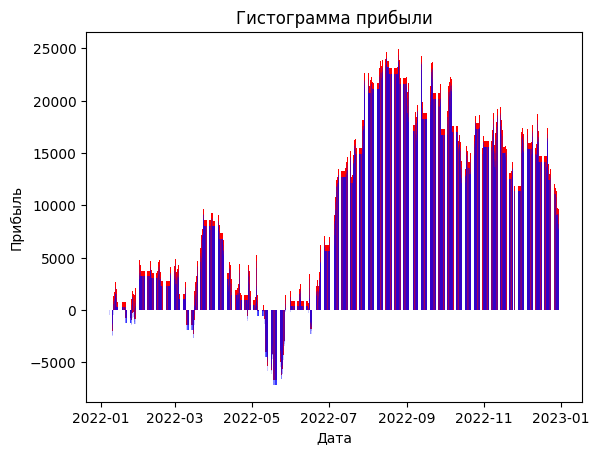

In [21]:
import matplotlib.pyplot as plt

plt.bar(signals_data['Datetime'], signals_data['profit_ml'], color='red')
plt.bar(signals_data['Datetime'], signals_data['profit'], color='blue', alpha=0.2)
plt.xlabel('Дата')
plt.ylabel('Прибыль')
plt.title('Гистограмма прибыли')
plt.show()

# Вывод

В ходе работы была опробована торговая стратегия с применением комплексного индикатора технического анализа MACD. С помощью стратегии удалось получить прибыль. \\
Затем данная стратегия была расширенна с помощью методов МО, благодаря чему удалось достичь еще более лучшего результата.